# Capstone Project: Telecom Churn

### Problem Statement: Telecom industry customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become more important than customer acquisition.

#### Solution: Reduce customer churn, telecom companies need to predict which highly profitable customers are at risk of churn.

### Step 1: Importing Data

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', -1)

In [2]:
df = pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
df.shape

(99999, 226)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
dd = pd.read_excel('Telecom Churn Data Dictionary.xlsx')
dd

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


### Step 2: Filter High Value Customers

In [6]:
# Calculate Average recharge amount for the ds 6 & 7
df['Avg_Amt'] = (df['total_rech_amt_6']+df['total_rech_amt_7'])/2

# Calculate 70th Percentile of the Avg rechage amount
sev_per = df['Avg_Amt'].quantile(0.7)

# Filter High Value Customers 
df = df[df['Avg_Amt']>sev_per]
df = df.drop(columns='Avg_Amt')
df.shape    

(29979, 226)

### Step 3: Tag churners and remove attributes of the Churn phase

In [7]:
# Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase
# Assigning 1 for those who meet the condition else 0

df['Churn'] = ((df['total_ic_mou_9'] == 0) | (df['total_og_mou_9'] == 0)) & ((df['vol_2g_mb_9'] == 0) & (df['vol_3g_mb_9'] == 0))
df['Churn'] = df['Churn'].astype(int)

In [8]:
# Count of Churn
Churn_1 = (df['Churn']==1).sum()
Churn_0 = (df['Churn']==0).sum()
print(Churn_1)
print(Churn_0)

2890
27089


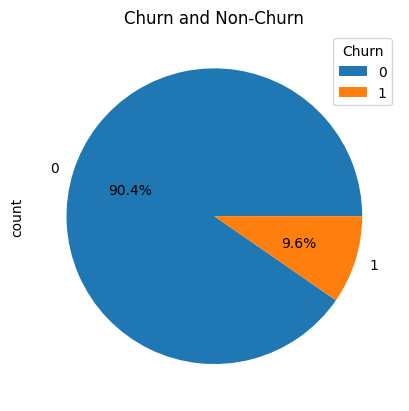

In [9]:
value_counts = df['Churn'].value_counts()
value_counts.plot.pie(autopct='%1.1f%%')
plt.title('Churn and Non-Churn')
plt.legend(title='Churn')
plt.savefig('./Univariate_Num.png')
plt.show()

#### 90% of the customers not churn and 10% would churn.  This shows class imbalance.

### Step 4: Data Cleaning

 #### Inspecting the Dataframe and removing unnecessary features

In [10]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29979 entries, 7 to 99997
Columns: 227 entries, mobile_number to Churn
dtypes: float64(179), int32(1), int64(35), object(12)
memory usage: 52.0+ MB


In [12]:
df.shape

(29979, 227)

In [13]:
# Select all object columns
df_obj = df.select_dtypes(include='object').columns
df[df_obj].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
7,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/27/2014,7/25/2014,8/26/2014,9/30/2014,NaN,NaN,NaN,NaN
8,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/25/2014,7/31/2014,8/30/2014,9/30/2014,NaN,7/31/2014,8/23/2014,NaN
13,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/20/2014,7/22/2014,8/30/2014,9/26/2014,NaN,NaN,8/30/2014,NaN
16,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/14/2014,09-10-2014,NaN,NaN,NaN,NaN
17,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/30/2014,8/25/2014,9/29/2014,NaN,NaN,NaN,NaN


In [14]:
# All object columns are date data type. So changing all object data type to Date data type
for col in df_obj:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29979 entries, 7 to 99997
Columns: 227 entries, mobile_number to Churn
dtypes: datetime64[ns](12), float64(179), int32(1), int64(35)
memory usage: 52.0 MB


In [16]:
# Find unique values in a column and delete them
unique_col=[]
for i in df.columns:
    if df[i].nunique() == 1:
        unique_col.append(i)
    else:
        pass

df.drop(unique_col, axis=1, inplace = True)
print("\n Columns are dropped \n", unique_col)


 Columns are dropped 
 ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [17]:
df.shape

(29979, 211)

In [18]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.21,NaN,180.54,173.08,193.94,NaN,626.46,558.04,428.74,0.00,0.21,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,2014-06-27,2014-07-25,2014-08-26,2014-09-30,0,0,779,0,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,

### Step 5: Handling Missing Values

In [19]:
# Find missing value NaN percentage
df_NaN = (round(100*(df.isnull().sum())/len(df), 2)).sort_values(ascending=False)

In [20]:
df_NaN.iloc[:41]

date_of_last_rech_data_9    90.90
date_of_last_rech_data_6    70.98
date_of_last_rech_data_8    70.30
date_of_last_rech_data_7    69.70
av_rech_amt_data_6          62.02
fb_user_6                   62.02
total_rech_data_6           62.02
max_rech_data_6             62.02
count_rech_2g_6             62.02
count_rech_3g_6             62.02
arpu_3g_6                   62.02
night_pck_user_6            62.02
arpu_2g_6                   62.02
av_rech_amt_data_9          61.82
night_pck_user_9            61.82
arpu_3g_9                   61.82
total_rech_data_9           61.82
fb_user_9                   61.82
max_rech_data_9             61.82
count_rech_2g_9             61.82
arpu_2g_9                   61.82
count_rech_3g_9             61.82
fb_user_7                   61.13
av_rech_amt_data_7          61.13
arpu_3g_7                   61.13
count_rech_2g_7             61.13
night_pck_user_7            61.13
arpu_2g_7                   61.13
max_rech_data_7             61.13
count_rech_3g_

#### Filling (blank) recharge related columns with 0 

In [21]:
df_rech = df.filter(like='rech').columns

In [22]:
df[df_rech].columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [23]:
df[df_rech].isnull().sum().sort_values(ascending=False)

date_of_last_rech_data_9    27251
date_of_last_rech_data_6    21278
date_of_last_rech_data_8    21074
date_of_last_rech_data_7    20895
total_rech_data_6           18592
av_rech_amt_data_6          18592
count_rech_3g_6             18592
count_rech_2g_6             18592
max_rech_data_6             18592
count_rech_3g_9             18532
count_rech_2g_9             18532
max_rech_data_9             18532
total_rech_data_9           18532
av_rech_amt_data_9          18532
count_rech_2g_7             18327
count_rech_3g_7             18327
av_rech_amt_data_7          18327
max_rech_data_7             18327
total_rech_data_7           18327
total_rech_data_8           18238
count_rech_3g_8             18238
max_rech_data_8             18238
count_rech_2g_8             18238
av_rech_amt_data_8          18238
date_of_last_rech_9          1651
date_of_last_rech_8          1503
date_of_last_rech_7           495
date_of_last_rech_6           468
total_rech_num_9                0
total_rech_amt

#### Create a boolean mask for rows where either 'total_rech_data_6' or 'max_rech_data_6' is null
#### Further filter the rows where 'date_of_last_rech_data_6' is also null
#### Update the selected rows in 'total_rech_data' and 'max_rech_data' columns with 0's where they are blanks

In [24]:
null_mask = df['total_rech_data_6'].isnull() & df['max_rech_data_6'].isnull()
date_null_mask = df['date_of_last_rech_data_6'].isnull()
df.loc[null_mask & date_null_mask, ['total_rech_data_6', 'max_rech_data_6']] = 0

null_mask = df['total_rech_data_7'].isnull() & df['max_rech_data_7'].isnull()
date_null_mask = df['date_of_last_rech_data_7'].isnull()
df.loc[null_mask & date_null_mask, ['total_rech_data_7', 'max_rech_data_7']] = 0

null_mask = df['total_rech_data_8'].isnull() & df['max_rech_data_8'].isnull()
date_null_mask = df['date_of_last_rech_data_8'].isnull()
df.loc[null_mask & date_null_mask, ['total_rech_data_8', 'max_rech_data_8']] = 0

null_mask = df['total_rech_data_9'].isnull() & df['max_rech_data_9'].isnull()
date_null_mask = df['date_of_last_rech_data_9'].isnull()
df.loc[null_mask & date_null_mask, ['total_rech_data_9', 'max_rech_data_9']] = 0

#### Let's check colineranity between Avg Revenue Per User and Avg Recharge Amount Data. Will delete the arpu features if high collinearity is found.

In [25]:
print(df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print()
print(df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print()
print(df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print()
print(df[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())
print()

                    arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.924582            0.835881
arpu_2g_6            0.924582   1.000000            0.871738
av_rech_amt_data_6   0.835881   0.871738            1.000000

                    arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.920113            0.816721
arpu_2g_7            0.920113   1.000000            0.847863
av_rech_amt_data_7   0.816721   0.847863            1.000000

                    arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.922085            0.824345
arpu_2g_8            0.922085   1.000000            0.849830
av_rech_amt_data_8   0.824345   0.849830            1.000000

                    arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.823059            0.721496
arpu_2g_9            0.823059   1.000000            0.852554
av_rech_amt_data_9   0.721496   0.852554            1.000000



#### Found high collinearity of arpu_2g and arpu_3g features with av_rech_amt. So, delete arpu_2g and arpu_3g for months 6,7,8 & 9

In [26]:
df.shape

(29979, 211)

In [27]:
df.drop(['arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9'], axis=1, inplace=True)

In [28]:
df.shape

(29979, 203)

#### Since Avg Revenue Per User (arpu_2g & arpu_3g) features were deleted, count_rech_2g & count_rech_3g can also be deleted.

In [29]:
df.drop(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9'], axis=1, inplace=True)

In [30]:
df.shape

(29979, 195)

In [31]:
round((df.isnull().sum().sort_values(ascending=False))/len(df)*100,2)

date_of_last_rech_data_9    90.90
date_of_last_rech_data_6    70.98
date_of_last_rech_data_8    70.30
date_of_last_rech_data_7    69.70
fb_user_6                   62.02
av_rech_amt_data_6          62.02
night_pck_user_6            62.02
night_pck_user_9            61.82
fb_user_9                   61.82
av_rech_amt_data_9          61.82
fb_user_7                   61.13
night_pck_user_7            61.13
av_rech_amt_data_7          61.13
fb_user_8                   60.84
night_pck_user_8            60.84
av_rech_amt_data_8          60.84
std_og_t2t_mou_9             5.68
spl_ic_mou_9                 5.68
std_og_t2m_mou_9             5.68
std_ic_mou_9                 5.68
std_og_t2f_mou_9             5.68
std_ic_t2f_mou_9             5.68
std_og_mou_9                 5.68
og_others_9                  5.68
isd_og_mou_9                 5.68
std_ic_t2m_mou_9             5.68
spl_og_mou_9                 5.68
std_ic_t2t_mou_9             5.68
isd_ic_mou_9                 5.68
loc_ic_mou_9  

#### Let's delete fb_user and nigh_pck_user for the months 6 to 9

In [32]:
df.drop(['fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9'], axis=1, inplace=True)

In [33]:
df.shape

(29979, 187)

In [34]:
round(((df.isnull().sum()/len(df))*100),2).sort_values(ascending=False)

date_of_last_rech_data_9    90.90
date_of_last_rech_data_6    70.98
date_of_last_rech_data_8    70.30
date_of_last_rech_data_7    69.70
av_rech_amt_data_6          62.02
av_rech_amt_data_9          61.82
av_rech_amt_data_7          61.13
av_rech_amt_data_8          60.84
loc_og_t2t_mou_9             5.68
loc_ic_t2t_mou_9             5.68
isd_ic_mou_9                 5.68
isd_og_mou_9                 5.68
loc_og_t2f_mou_9             5.68
spl_ic_mou_9                 5.68
std_ic_t2t_mou_9             5.68
loc_og_t2c_mou_9             5.68
std_ic_t2m_mou_9             5.68
std_og_mou_9                 5.68
loc_og_mou_9                 5.68
std_ic_mou_9                 5.68
loc_ic_mou_9                 5.68
std_og_t2t_mou_9             5.68
std_og_t2f_mou_9             5.68
std_ic_t2f_mou_9             5.68
loc_og_t2m_mou_9             5.68
std_og_t2m_mou_9             5.68
ic_others_9                  5.68
onnet_mou_9                  5.68
loc_ic_t2m_mou_9             5.68
offnet_mou_9  

#### Let's fill 0 in Avg Rech Amt if Avg Rech Amt and Total Rech values are 0

In [35]:
null_mask = df['av_rech_amt_data_6'].isnull() & df['total_rech_data_6'].isnull()
df.loc[null_mask, 'av_rech_amt_data_6'] = 0
df.loc[null_mask, 'total_rech_data_6'] = 0

null_mask = df['av_rech_amt_data_7'].isnull() & df['total_rech_data_7'].isnull()
df.loc[null_mask, 'av_rech_amt_data_7'] = 0
df.loc[null_mask, 'total_rech_data_7'] = 0

null_mask = df['av_rech_amt_data_8'].isnull() & df['total_rech_data_8'].isnull()
df.loc[null_mask, 'av_rech_amt_data_8'] = 0
df.loc[null_mask, 'total_rech_data_8'] = 0

null_mask = df['av_rech_amt_data_9'].isnull() & df['total_rech_data_9'].isnull()
df.loc[null_mask, 'av_rech_amt_data_9'] = 0
df.loc[null_mask, 'total_rech_data_9'] = 0

In [36]:
round(((df.isnull().sum()/len(df))*100),2).sort_values(ascending=False)

date_of_last_rech_data_9    90.90
date_of_last_rech_data_6    70.98
date_of_last_rech_data_8    70.30
date_of_last_rech_data_7    69.70
av_rech_amt_data_6          62.02
av_rech_amt_data_9          61.82
av_rech_amt_data_7          61.13
av_rech_amt_data_8          60.84
loc_og_t2t_mou_9             5.68
loc_ic_t2t_mou_9             5.68
isd_ic_mou_9                 5.68
isd_og_mou_9                 5.68
loc_og_t2f_mou_9             5.68
spl_ic_mou_9                 5.68
std_ic_t2t_mou_9             5.68
loc_og_t2c_mou_9             5.68
std_ic_t2m_mou_9             5.68
std_og_mou_9                 5.68
loc_og_mou_9                 5.68
std_ic_mou_9                 5.68
loc_ic_mou_9                 5.68
std_og_t2t_mou_9             5.68
std_og_t2f_mou_9             5.68
std_ic_t2f_mou_9             5.68
loc_og_t2m_mou_9             5.68
std_og_t2m_mou_9             5.68
ic_others_9                  5.68
onnet_mou_9                  5.68
loc_ic_t2m_mou_9             5.68
offnet_mou_9  

In [37]:
df.shape

(29979, 187)

#### As the Total Rech Data and Max Rech Data has been imputed with 0s, date_of_last_rech_data and date_of_last_rech shall be deleted for the months 6 to 9

In [38]:
df.drop(['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], axis=1, inplace=True)    

In [39]:
df.shape

(29979, 179)

#### Let's delete columns ending with _9

In [40]:
col_drop = [col for col in df.columns if col.endswith('_9')]
df = df.drop(columns=col_drop)

In [41]:
df.shape

(29979, 136)

In [42]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,NaN,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.

In [43]:
avg_cols = ['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
df[avg_cols] = df[avg_cols].fillna(0)

In [44]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

In [45]:
col_nan = df[num_cols].columns[df[num_cols].isna().any()].tolist()
print(col_nan)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic

In [46]:
df[col_nan] = df[col_nan].fillna(0)

#### Let's find numerical columns for scaling and imputation

In [47]:
df['Avg_arpu_67'] = (df['arpu_6'] + df['arpu_7'])/2
df.drop(['arpu_6', 'arpu_7'], axis=1, inplace=True)

In [48]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols

['mobile_number',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_m

In [49]:
num_cols.remove('mobile_number')
num_cols

['arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2

In [50]:
df[num_cols].head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_arpu_67
7,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1209.5150
8,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,154.0,23.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,435.4720
13,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00

In [51]:
ph_aon_chu = df[['mobile_number', 'aon', 'Churn']].copy()
ph_aon_chu.head()

,mobile_number,aon,Churn
7,7000701601,802,1
8,7001524846,315,0
13,7002191713,2607,0
16,7000875565,511,0
17,7000187447,667,0


In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df[num_cols].head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_arpu_67
7,5.353777,-0.517203,-0.518534,-0.461752,0.074989,0.293931,-0.103109,-0.015129,0.261386,0.246383,-0.047277,-0.096623,0.155950,-0.182917,-0.259450,-0.199739,0.508711,1.104831,-0.022720,2.432634,2.125772,2.310355,-0.227462,-0.201272,-0.231596,0.365928,0.664091,-0.015044,-0.452813,-0.412730,-0.390889,-0.370652,-0.414876,-0.313072,0.372923,1.350905,1.271892,-0.550940,-0.533947,-0.447690,-0.049342,-0.044429,0.178065,-0.076260,-0.321969,-0.017001,-0.303715,-0.01737,-0.017819,-0.302082,-0.146354,-0.399224,-0.066992,-0.227456,-0.248121,0.260622,0.276226,-0.149545,2.978507,1.715980,0.567517,0.587407,0.340699,-0.150728,0.261750,-0.059906,0.211522,0.587485,0.883474,1.052885,2.473256,1.522527,0.962874,0.920519,0.801995,1.033698,0.882518,0.657411,0.369770,0.737264,-0.099251,-0.237147,-0.135153,0.028439,0.265630,1.039734,0.889552,1.078229,-0.746182,-0.719810,-0.340310,1.635428,0.166615,5.023094,8.059807,3.382510,8.206883,-0.732120,-0.745871,4.702271,-0.4304,-0.436791,-0.430390,-0.538029,-0.542798,-0.527386,-0.474664,-0.491882,-0.483114,-0.284214,-0.278850,-0.257802,-0.298433,-0.325134,-0.314134,-0.333523,-0.338912,-0.319257,-0.294215,-0.308843,-0.329358,-0.30295,-0.298532,-0.297206,-0.157612,-0.155026,-0.144072,-0.473929,-0.183664,-0.283787,-0.263426,-0.134784,1.517930
8,-0.807623,0.254817,0.096353,-0.498624,-0.687110,-0.705716,-0.499697,-0.220075,-0.177298,-0.177821,-0.247398,-0.225127,-0.202116,0.854148,0.490653,-0.318080,-0.401143,-0.459876,-0.498426,-0.307844,-0.314183,-0.321143,-0.227462,-0.201272,0.734483,0.249995,0.010532,-0.540738,-0.178918,-0.155572,-0.365122,-0.458165,-0.464454,-0.249391,-0.161437,-0.152421,-0.152990,-0.436552,-0.426774,-0.414532,-0.049342,-0.048373,-0.045288,-0.317804,-0.321969,0.145860,-0.303715,-0.01737,-0.017819,-0.270547,-0.405492,-0.659498,-0.283123,-0.361412,-0.421457,-0.459718,-0.669110,-0.636563,-0.340363,-0.333715,-0.336455,-0.519723,-0.709446,-0.711590,-0.205813,-0.192675,-0.206454,-0.094936,-0.277884,-0.282766,-0.144290,-0.145959,-0.132301,-0.204319,-0.326565,-0.336372,-0.564006,-0.774725,-0

In [54]:
round((df.isnull().sum()/len(df))*100,2).sort_values(ascending=False)

mobile_number         0.0
isd_ic_mou_8          0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_6    0.0
max_rech_amt_8        0.0
max_rech_amt_7        0.0
max_rech_amt_6        0.0
total_rech_amt_8      0.0
total_rech_amt_7      0.0
total_rech_amt_6      0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
total_rech_num_6      0.0
ic_others_8           0.0
ic_others_7           0.0
ic_others_6           0.0
isd_ic_mou_7          0.0
total_rech_data_6     0.0
isd_ic_mou_6          0.0
spl_ic_mou_8          0.0
spl_ic_mou_7          0.0
spl_ic_mou_6          0.0
total_ic_mou_8        0.0
total_ic_mou_7        0.0
total_ic_mou_6        0.0
std_ic_mou_8          0.0
std_ic_mou_7          0.0
std_ic_mou_6          0.0
std_ic_t2f_mou_8      0.0
std_ic_t2f_mou_7      0.0
std_ic_t2f_mou_6      0.0
std_ic_t2m_mou_8      0.0
last_day_rch_amt_8    0.0
total_rech_data_7     0.0
std_ic_t2m_mou_6      0.0
sachet_2g_6           0.0
Churn                 0.0
sep_vbc_3g            0.0
jun_vbc_3g  

In [55]:
df.shape

(29979, 135)

In [56]:
avg = [col for col in df.columns if col.startswith('av')]
total = [col for col in df.columns if col.startswith('total')]
print(avg)
print(total)

['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8']


#### Let's find correlation between the features and delete with high collinearity

In [57]:
df_var = df.drop(['mobile_number', 'Churn'], axis=1)
df_var.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Avg_arpu_67
7,5.353777,-0.517203,-0.518534,-0.461752,0.074989,0.293931,-0.103109,-0.015129,0.261386,0.246383,-0.047277,-0.096623,0.155950,-0.182917,-0.259450,-0.199739,0.508711,1.104831,-0.022720,2.432634,2.125772,2.310355,-0.227462,-0.201272,-0.231596,0.365928,0.664091,-0.015044,-0.452813,-0.412730,-0.390889,-0.370652,-0.414876,-0.313072,0.372923,1.350905,1.271892,-0.550940,-0.533947,-0.447690,-0.049342,-0.044429,0.178065,-0.076260,-0.321969,-0.017001,-0.303715,-0.01737,-0.017819,-0.302082,-0.146354,-0.399224,-0.066992,-0.227456,-0.248121,0.260622,0.276226,-0.149545,2.978507,1.715980,0.567517,0.587407,0.340699,-0.150728,0.261750,-0.059906,0.211522,0.587485,0.883474,1.052885,2.473256,1.522527,0.962874,0.920519,0.801995,1.033698,0.882518,0.657411,0.369770,0.737264,-0.099251,-0.237147,-0.135153,0.028439,0.265630,1.039734,0.889552,1.078229,-0.746182,-0.719810,-0.340310,1.635428,0.166615,5.023094,8.059807,3.382510,8.206883,-0.732120,-0.745871,4.702271,-0.4304,-0.436791,-0.430390,-0.538029,-0.542798,-0.527386,-0.474664,-0.491882,-0.483114,-0.284214,-0.278850,-0.257802,-0.298433,-0.325134,-0.314134,-0.333523,-0.338912,-0.319257,-0.294215,-0.308843,-0.329358,-0.30295,-0.298532,-0.297206,-0.157612,-0.155026,-0.144072,-0.473929,-0.183664,-0.283787,-0.263426,-0.134784,1.517930
8,-0.807623,0.254817,0.096353,-0.498624,-0.687110,-0.705716,-0.499697,-0.220075,-0.177298,-0.177821,-0.247398,-0.225127,-0.202116,0.854148,0.490653,-0.318080,-0.401143,-0.459876,-0.498426,-0.307844,-0.314183,-0.321143,-0.227462,-0.201272,0.734483,0.249995,0.010532,-0.540738,-0.178918,-0.155572,-0.365122,-0.458165,-0.464454,-0.249391,-0.161437,-0.152421,-0.152990,-0.436552,-0.426774,-0.414532,-0.049342,-0.048373,-0.045288,-0.317804,-0.321969,0.145860,-0.303715,-0.01737,-0.017819,-0.270547,-0.405492,-0.659498,-0.283123,-0.361412,-0.421457,-0.459718,-0.669110,-0.636563,-0.340363,-0.333715,-0.336455,-0.519723,-0.709446,-0.711590,-0.205813,-0.192675,-0.206454,-0.094936,-0.277884,-0.282766,-0.144290,-0.145959,-0.132301,-0.204319,-0.326565,-0.336372,-0.564006,-0.774725,-0

In [58]:
df_corr = df_var.corr()
df_corr.loc[:,:] = np.tril(df_corr, k=-1)
df_corr = df_corr.stack()
df_corr
df_corr[(df_corr > 0.80) | (df_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                0.953727
isd_og_mou_8        isd_og_mou_7          0.941344
                    isd_og_mou_6          0.916080
isd_og_mou_7        isd_og_mou_6          0.914987
total_ic_mou_6      loc_ic_mou_6          0.895636
total_ic_mou_8      loc_ic_mou_8          0.889923
total_ic_mou_7      loc_ic_mou_7          0.882866
sachet_2g_8         total_rech_data_8     0.872483
Avg_arpu_67         total_rech_amt_6      0.870459
sachet_2g_7         total_rech_data_7     0.865467
sachet_2g_6         total_rech_data_6     0.862048
Avg_arpu_67         total_rech_amt_7      0.859388
std_og_t2t_mou_8    onnet_mou_8           0.857370
loc_ic_mou_8        loc_ic_t2m_mou_8      0.853464
std_og_t2t_mou_7    onnet_mou_7           0.853093
loc_ic_mou_6        loc_ic_t2m_mou_6      0.851889
std_og_t2m_mou_7    offnet_mou_7          0.851101
std_og_t2t_mou_6    onnet_mou_6           0.851007
std_og_t2m_mou_8    offnet_mou_8          0.848721
std_ic_mou_8        std_ic_t2m_

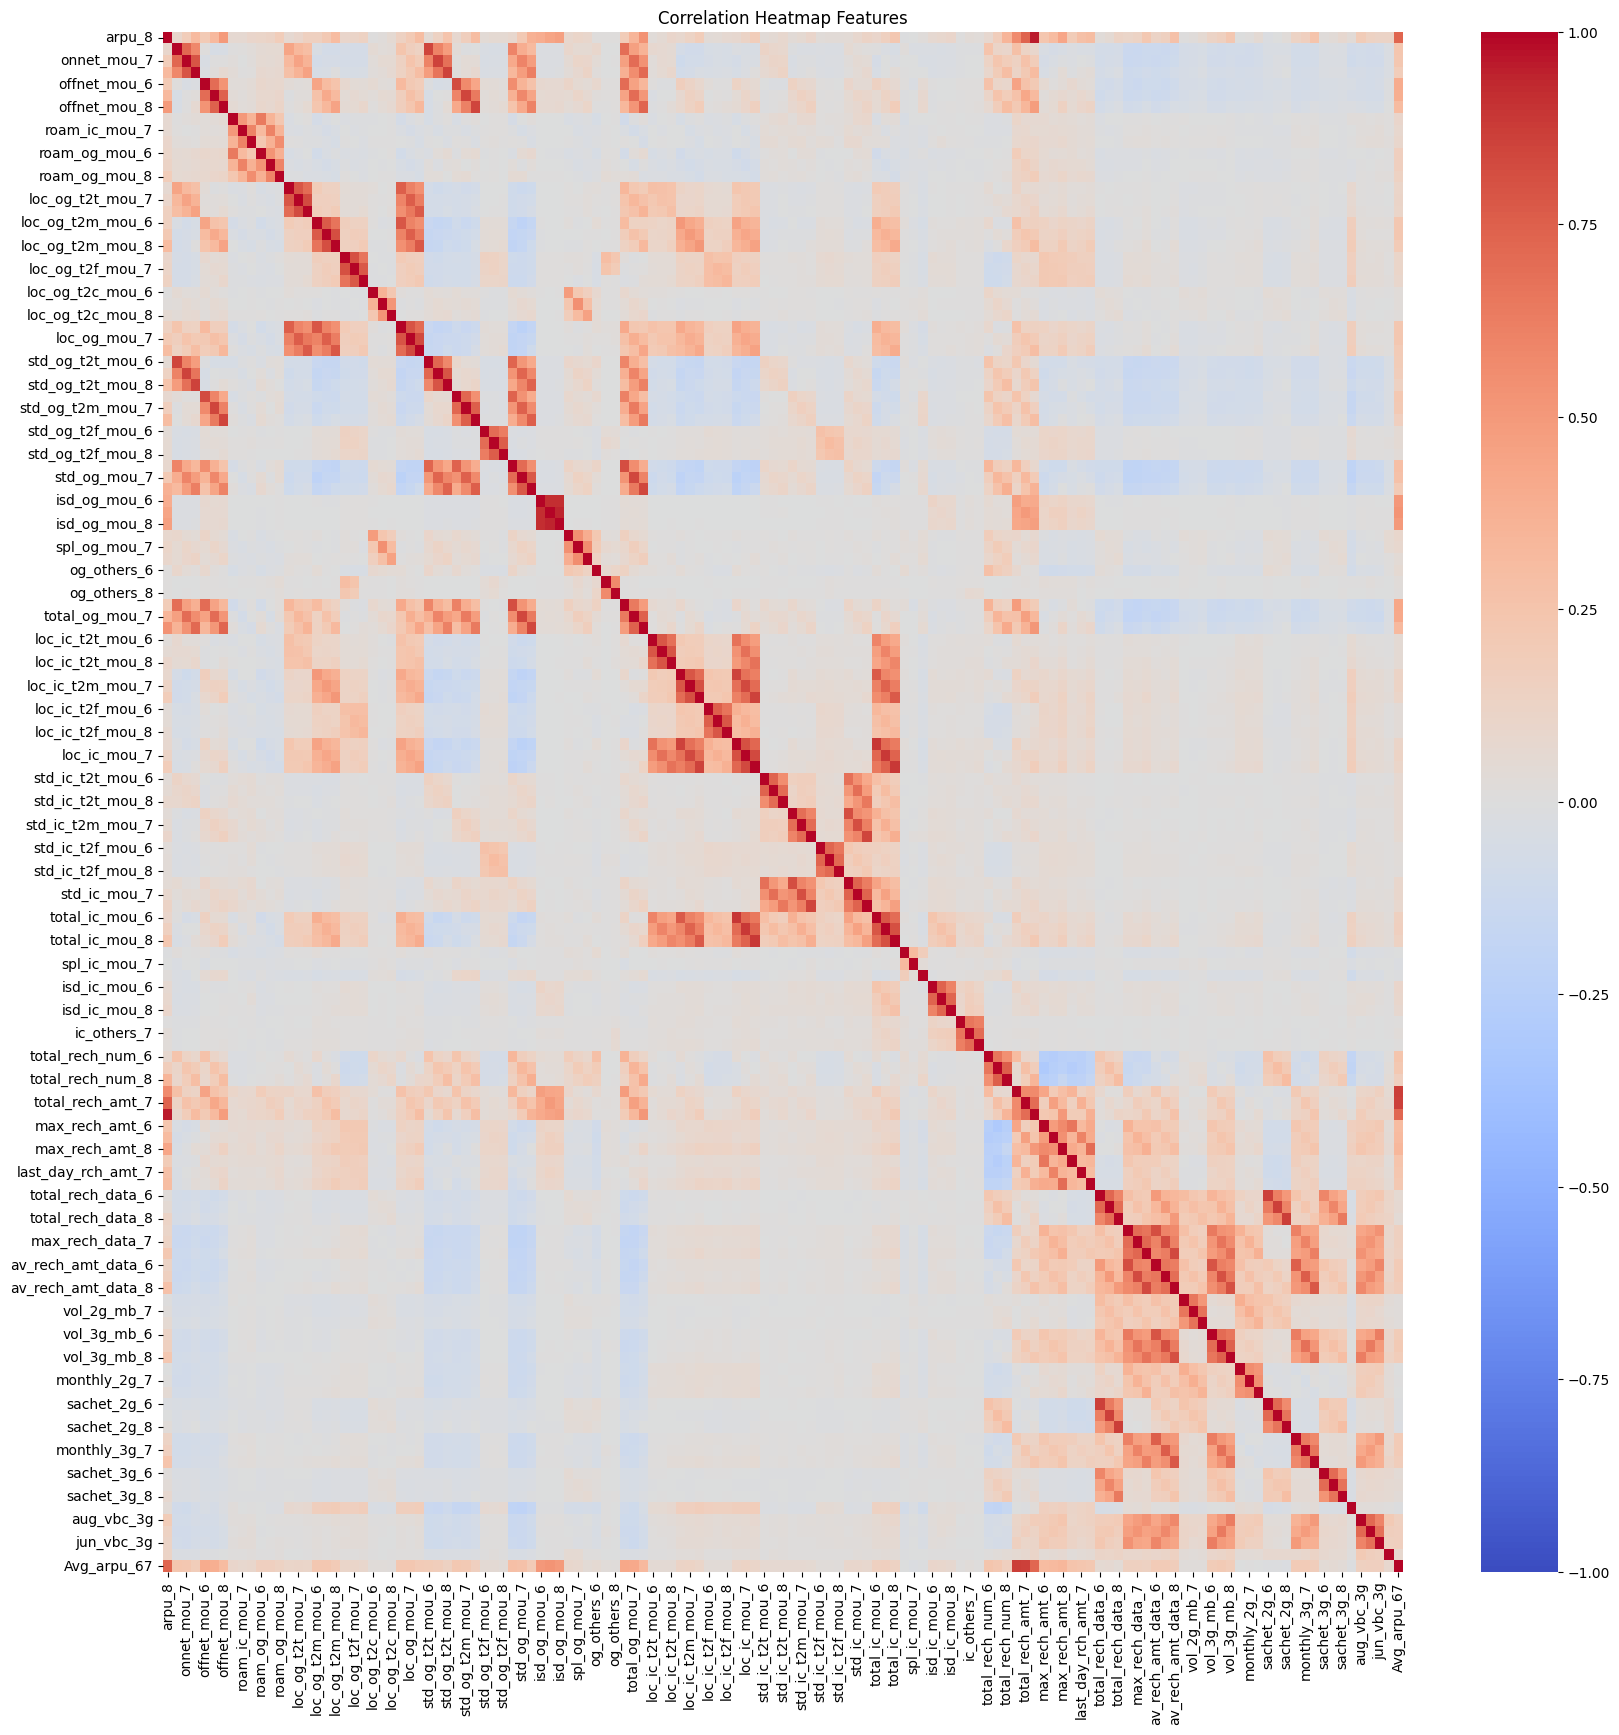

Pairs with correlation above threshold:
                      arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
arpu_8              1.000000          NaN          NaN          NaN   
onnet_mou_6              NaN     1.000000          NaN          NaN   
onnet_mou_7              NaN          NaN     1.000000          NaN   
onnet_mou_8              NaN          NaN          NaN      1.00000   
offnet_mou_6             NaN          NaN          NaN          NaN   
offnet_mou_7             NaN          NaN          NaN          NaN   
offnet_mou_8             NaN          NaN          NaN          NaN   
roam_ic_mou_6            NaN          NaN          NaN          NaN   
roam_ic_mou_7            NaN          NaN          NaN          NaN   
roam_ic_mou_8            NaN          NaN          NaN          NaN   
roam_og_mou_6            NaN          NaN          NaN          NaN   
roam_og_mou_7            NaN          NaN          NaN          NaN   
roam_og_mou_8            NaN         

In [59]:
# Calculate the correlation matrix

correlation_matrix = df_var.corr()
# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap Features')
plt.show()
# Filter correlations above a certain threshold (e.g., 0.8 or -0.8)
threshold = 0.8
high_correlation = correlation_matrix[(correlation_matrix > threshold) | (correlation_matrix < -threshold)]
print("Pairs with correlation above threshold:")
print(high_correlation)

In [60]:
drop_lst = ['total_rech_amt_6', 'total_rech_amt_7', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
                 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_7', 'loc_og_mou_7', 'onnet_mou_6',
                 'offnet_mou_6', 'isd_og_mou_6', 'isd_og_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'loc_ic_t2m_mou_7',
                 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'total_ic_mou_6', 'total_ic_mou_7', 'std_ic_mou_6', 'std_ic_mou_7', 'loc_ic_mou_6',
                 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'loc_ic_mou_7', 'total_ic_mou_7', 'sachet_2g_6', 'sachet_2g_7', 'av_rech_amt_data_6',
                 'av_rech_amt_data_7', 'max_rech_data_6', 'max_rech_data_7', 'vol_3g_mb_8', 'total_rech_data_6', 'total_rech_data_7']
drop_s = pd.Series(drop_lst)
corr_col_drop = drop_s.drop_duplicates().tolist()
df.drop(corr_col_drop, axis=1, inplace=True)

In [61]:
df.shape

(29979, 99)

In [62]:
df.head()

,mobile_number,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,Avg_arpu_67
7,7000701601,5.353777,-0.518534,-0.461752,0.293931,-0.103109,-0.015129,0.261386,0.246383,-0.047277,-0.096623,0.155950,-0.182917,-0.199739,0.508711,2.432634,2.310355,-0.227462,-0.201272,-0.231596,0.365928,-0.015044,-0.390889,-0.313072,0.372923,1.350905,1.271892,-0.447690,0.178065,-0.076260,-0.321969,-0.017001,-0.303715,-0.01737,-0.017819,-0.302082,-0.146354,-0.399224,-0.066992,-0.227456,-0.248121,-0.149545,2.978507,1.715980,0.567517,-0.150728,0.261750,-0.059906,0.211522,1.052885,2.473256,1.522527,0.962874,1.033698,0.369770,0.737264,-0.099251,-0.237147,-0.135153,0.028439,0.265630,1.039734,0.889552,1.078229,-0.746182,-0.719810,-0.340310,5.023094,8.059807,3.382510,8.206883,-0.732120,-0.745871,4.702271,-0.430390,-0.527386,-0.483114,-0.284214,-0.278850,-0.257802,-0.298433,-0.325134,-0.333523,-0.338912,-0.319257,-0.329358,-0.30295,-0.298532,-0.297206,-0.157612,-0.155026,-0.144072,-0.473929,-0.183664,-0.283787,-0.263426,-0.134784,1,1.517930
8,7001524846,-0.807623,0.096353,-0.498624,-0.705716,-0.499697,-0.220075,-0.177298,-0.177821,-0.247398,-0.225127,-0.202116,0.854148,-0.318080,-0.401143,-0.307844,-0.321143,-0.227462,-0.201272,0.734483,0.249995,-0.540738,-0.365122,-0.249391,-0.161437,-0.152421,-0.152990,-0.414532,-0.045288,-0.317804,-0.321969,0.145860,-0.303715,-0.01737,-0.017819,-0.270547,-0.405492,-0.659498,-0.283123,-0.361412,-0.421457,-0.636563,-0.340363,-0.333715,-0.336455,-0.711590,-0.205813,-0.192675,-0.206454,-0.282766,-0.144290,-0.145959,-0.132301,-0.336372,-0.773941,-0.343439,-0.099251,-0.237147,-0.165800,-0.160360,-0.156001,-0.085021,-0.095895,-0.095963,0.720360,0.945885,0.398098,-0.820395,-0.466190,-0.119618,-0.769853,-0.382020,-0.745871,-0.589590,0.816605,-0.307946,-0.111915,-0.284214,0.990649,-0.257691,-0.298433,0.552060,-0.333523,2.239829,-0.319257,1.297034,-0.30295,-0.298532,-0.297206,-0.157612,-0.155026,-0.144072,-0.973332,-0.277643,1.899565,0.001819,-0.134784,0,-0.374061
13,7002191713,0.118171,-0.407093,0.570831,-0.626304,0.224642,0.077053,1.712096,0.788972,-0.180129,0.134767,-0.188569,-0.190345,-0.217922,-0.120717,-0.107590,0.841106,-0.227462,-0.201272,-0.165389,-0.204529,0.252781,0.794417,-0.054508,-0.161437,-0.152421,-0.152990,0.488877,-0.016504,-0.317804,-0.321969,-0.092100,-0.303715,-0.01737,-0.017819,0.333090,-0.754623,0.570027,-0.005619,-0.374915,-0.085891,0.191336,-0.235449,-0.333715,-0.165174,0.068147,1.260377,0.252367,1.925235,2.729380,-0.144290,-0.145959,-0.038119,3.022743,2.355837,1.972354,-0.099251,-0.237147,3.483360,0.646679,5.094570,5.880325,0.957670,1.566829,-0.641429,-0.823916,0.081637,0.171238,-0.351747,-0.36

In [63]:
ph_aon_chu['tenure'] = round((ph_aon_chu['aon']/30),0)
ph_aon_chu.head()

,mobile_number,aon,Churn,tenure
7,7000701601,802,1,27.0
8,7001524846,315,0,10.0
13,7002191713,2607,0,87.0
16,7000875565,511,0,17.0
17,7000187447,667,0,22.0


In [64]:
ph_aon_chu['tenure'].sort_values(ascending=True).unique()

array([  6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,
        17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,
        28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,
        39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,
        50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,
        61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,
        72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,
        83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,
        94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104.,
       105., 106., 107., 108., 109., 110., 111., 112., 113., 114., 115.,
       116., 117., 118., 119., 120., 121., 122., 123., 126., 127., 130.,
       131., 132., 133., 140., 141., 144.])

In [65]:
# Define bin edges
bin_edges = [0, 6, 12, 24, 60, float('inf')]  # Bin edges for various time periods
# Define labels for the bins
bin_labels = ['0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '>5 Yrs']
# Use cut() function with custom labels
ph_aon_chu['bins'] = pd.cut(ph_aon_chu['tenure'], bins=bin_edges, labels=bin_labels)
df['bins'] = pd.cut(ph_aon_chu['tenure'], bins=bin_edges, labels=bin_labels)
ph_aon_chu.head()

,mobile_number,aon,Churn,tenure,bins
7,7000701601,802,1,27.0,2-5 Yrs
8,7001524846,315,0,10.0,6-12 Months
13,7002191713,2607,0,87.0,>5 Yrs
16,7000875565,511,0,17.0,1-2 Yrs
17,7000187447,667,0,22.0,1-2 Yrs


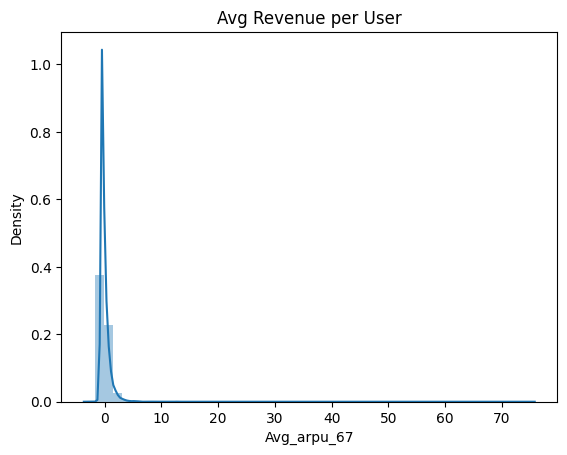

In [66]:
sns.distplot(df['Avg_arpu_67'])
plt.title('Avg Revenue per User')
plt.savefig('./Avg_Revenue.png')
plt.show()

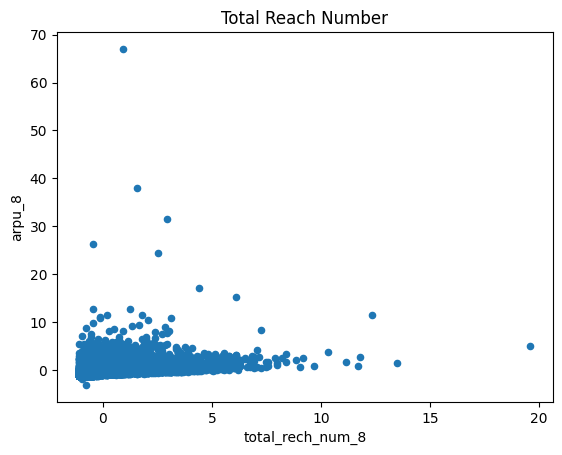

In [67]:
df[['total_rech_num_8', 'arpu_8']].plot.scatter(x ='total_rech_num_8', y='arpu_8')
plt.title('Total Reach Number')
plt.savefig('./Total_Reach.png')
plt.show()

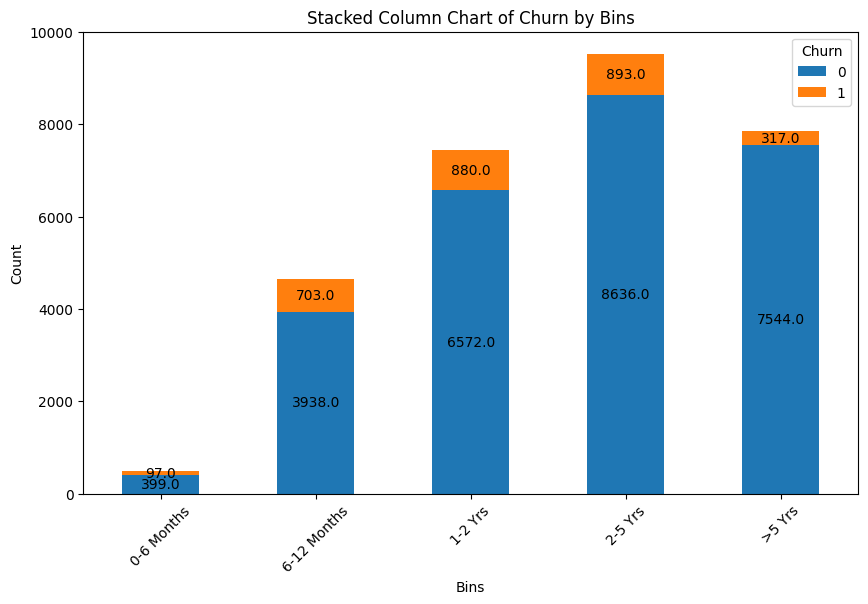

In [68]:
counts = ph_aon_chu.groupby(['bins', 'Churn']).size().unstack(fill_value=0)
# Plot stacked column chart
ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6))
# Add labels and title
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

# Add labels and title
plt.xlabel('Bins')
plt.ylabel('Count')
plt.title('Stacked Column Chart of Churn by Bins')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.savefig('./Churn Distribution.png')
# Show plot
plt.show()

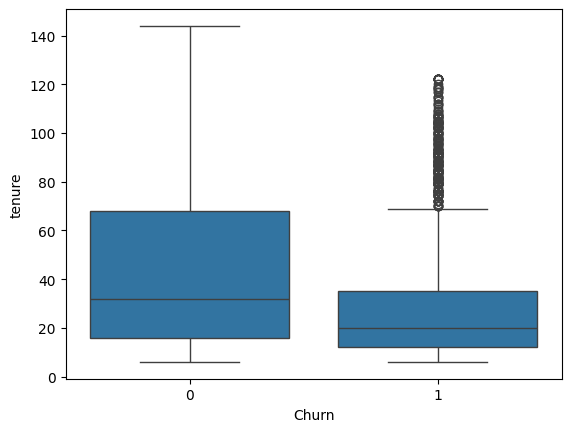

In [69]:
sns.boxplot(x = ph_aon_chu.Churn, y = ph_aon_chu.tenure)
plt.show()

In [70]:
# Creating categories for month 8 column totalrecharge and their count
df['total_rech_data_group_8']=pd.cut(df['total_rech_data_8'],[-1,0,10,25,100],labels=["No Recharge","<10 Recharges","10-25 Recharges",">25 Recharges"])
df['total_rech_num_group_8']=pd.cut(df['total_rech_num_8'],[-1,0,10,25,1000],labels=["No Recharge","<10 Recharges","10-25 Recharges",">25 Recharges"])

Distribution of total_rech_data_8 variable
 total_rech_data_group_8
No Recharge        24018
<10 Recharges       5931
10-25 Recharges       30
>25 Recharges          0
Name: count, dtype: int64


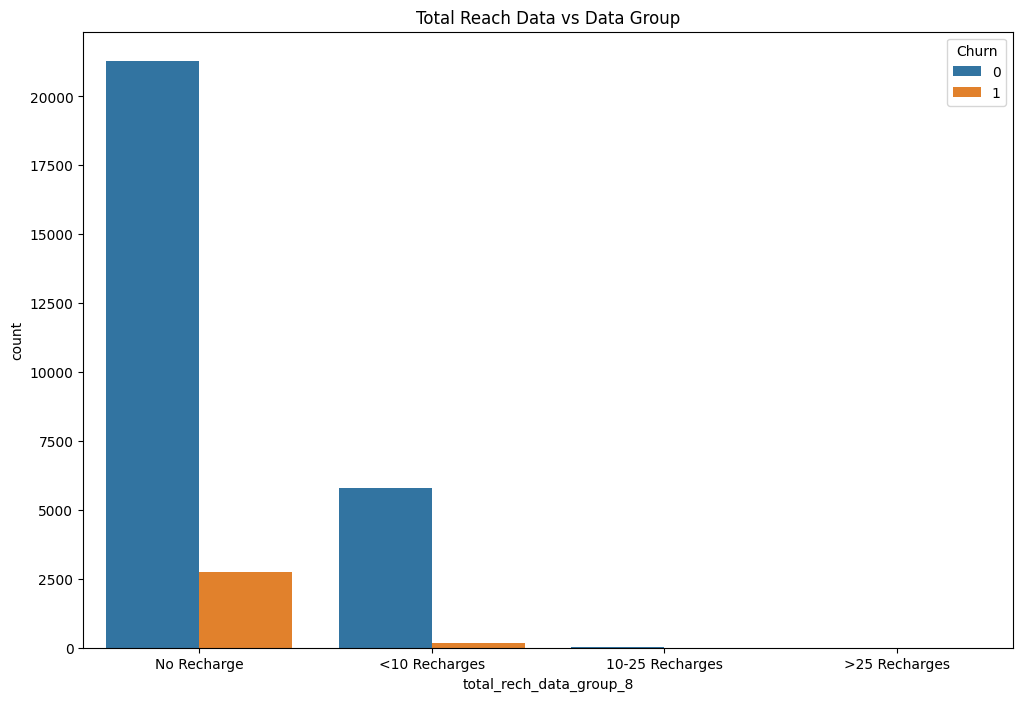

In [71]:
plt.figure(figsize=[12,8])
sns.countplot(data=df,x="total_rech_data_group_8",hue="Churn")
print("Distribution of total_rech_data_8 variable\n",df['total_rech_data_group_8'].value_counts())
plt.title('Total Reach Data vs Data Group')
plt.savefig('./Data Distribution.jpg')
plt.show()

Distribution of total_rech_num_8 variable
 total_rech_num_group_8
No Recharge        19110
<10 Recharges      10268
10-25 Recharges        7
>25 Recharges          0
Name: count, dtype: int64


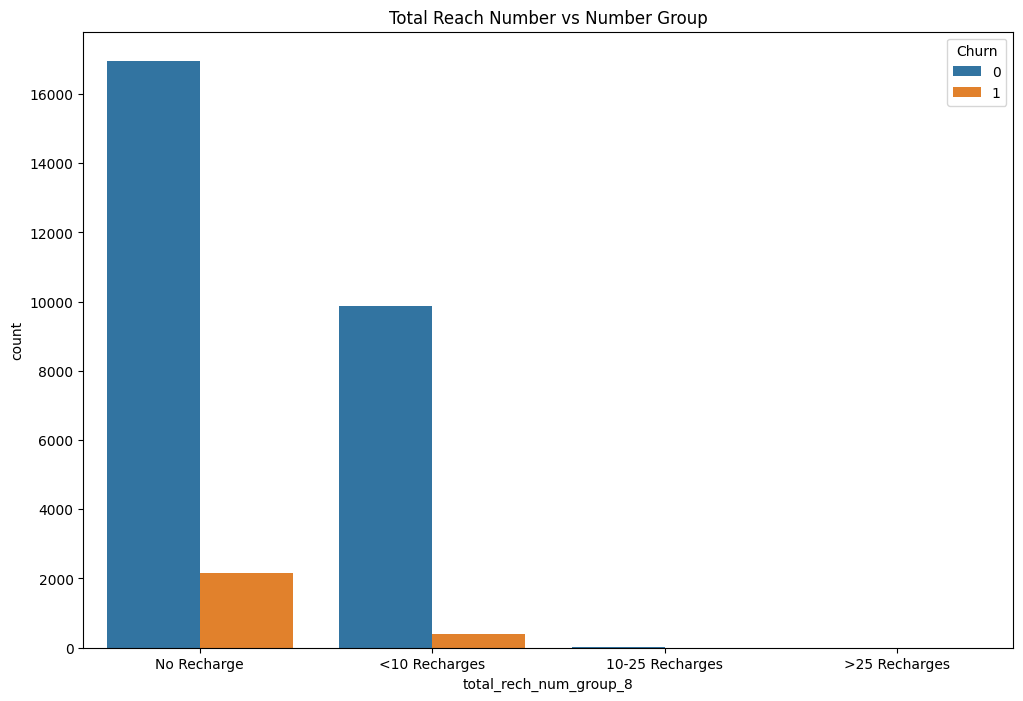

In [72]:
plt.figure(figsize=[12,8])
sns.countplot(data=df,x="total_rech_num_group_8",hue="Churn")
print("Distribution of total_rech_num_8 variable\n",df['total_rech_num_group_8'].value_counts())
plt.title('Total Reach Number vs Number Group')
plt.savefig('./Reach Distribution.jpg')
plt.show()

In [73]:
temp = pd.get_dummies(df[['total_rech_data_group_8','total_rech_num_group_8','bins']], drop_first=True)
df = pd.concat([df, temp], axis=1)
df.drop(['total_rech_data_group_8', 'total_rech_num_group_8', 'bins', 'sep_vbc_3g'], axis=1, inplace=True)
df.head()

,mobile_number,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn,Avg_arpu_67,total_rech_data_group_8_<10 Recharges,total_rech_data_group_8_10-25 Recharges,total_rech_data_group_8_>25 Recharges,total_rech_num_group_8_<10 Recharges,total_rech_num_group_8_10-25 Recharges,total_rech_num_group_8_>25 Recharges,bins_6-12 Months,bins_1-2 Yrs,bins_2-5 Yrs,bins_>5 Yrs
7,7000701601,5.353777,-0.518534,-0.461752,0.293931,-0.103109,-0.015129,0.261386,0.246383,-0.047277,-0.096623,0.155950,-0.182917,-0.199739,0.508711,2.432634,2.310355,-0.227462,-0.201272,-0.231596,0.365928,-0.015044,-0.390889,-0.313072,0.372923,1.350905,1.271892,-0.447690,0.178065,-0.076260,-0.321969,-0.017001,-0.303715,-0.01737,-0.017819,-0.302082,-0.146354,-0.399224,-0.066992,-0.227456,-0.248121,-0.149545,2.978507,1.715980,0.567517,-0.150728,0.261750,-0.059906,0.211522,1.052885,2.473256,1.522527,0.962874,1.033698,0.369770,0.737264,-0.099251,-0.237147,-0.135153,0.028439,0.265630,1.039734,0.889552,1.078229,-0.746182,-0.719810,-0.340310,5.023094,8.059807,3.382510,8.206883,-0.732120,-0.745871,4.702271,-0.430390,-0.527386,-0.483114,-0.284214,-0.278850,-0.257802,-0.298433,-0.325134,-0.333523,-0.338912,-0.319257,-0.329358,-0.30295,-0.298532,-0.297206,-0.157612,-0.155026,-0.144072,-0.473929,-0.183664,-0.283787,-0.263426,1,1.517930,False,False,False,False,False,False,False,False,True,False
8,7001524846,-0.807623,0.096353,-0.498624,-0.705716,-0.499697,-0.220075,-0.177298,-0.177821,-0.247398,-0.225127,-0.202116,0.854148,-0.318080,-0.401143,-0.307844,-0.321143,-0.227462,-0.201272,0.734483,0.249995,-0.540738,-0.365122,-0.249391,-0.161437,-0.152421,-0.152990,-0.414532,-0.045288,-0.317804,-0.321969,0.145860,-0.303715,-0.01737,-0.017819,-0.270547,-0.405492,-0.659498,-0.283123,-0.361412,-0.421457,-0.636563,-0.340363,-0.333715,-0.336455,-0.711590,-0.205813,-0.192675,-0.206454,-0.282766,-0.144290,-0.145959,-0.132301,-0.336372,-0.773941,-0.343439,-0.099251,-0.237147,-0.165800,-0.160360,-0.156001,-0.085021,-0.095895,-0.095963,0.720360,0.945885,0.398098,-0.820395,-0.466190,-0.119618,-0.769853,-0.382020,-0.745871,-0.589590,0.816605,-0.307946,-0.111915,-0.284214,0.990649,-0.257691,-0.298433,0.552060,-0.333523,2.239829,-0.319257,1.297034,-0.30295,-0.298532,-0.297206,-0.157612,-0.155026,-0.144072,-0.973332,-0.277643,1.899565,0.001819,0,-0.374061,True,False,False,True,False,False,True,False,False,False
13,7002191713,0.118171,-0.407093,0.570831,-0.626304,0.224642,0.077053,1.712096,0.788972,-0.180129,0.134767,-0.188569,-0.190345,-0.217922,-0.120717,-0.107590,0.841106,-0.227462,-0.201272,-0.165389,-0.204529,0.252781,0.794417,-0.054508,-0.161437,-0.152421,-0.152990,0.488877,-0.016504,-0.317804,-0.321

In [74]:
df_bool = df.select_dtypes(include='bool').columns
df[df_bool] = df[df_bool].astype(int)

In [75]:
# Creating dataset for model building
X = df.drop(['Churn', 'mobile_number'], axis=1)
X.head()

,arpu_8,onnet_mou_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Avg_arpu_67,total_rech_data_group_8_<10 Recharges,total_rech_data_group_8_10-25 Recharges,total_rech_data_group_8_>25 Recharges,total_rech_num_group_8_<10 Recharges,total_rech_num_group_8_10-25 Recharges,total_rech_num_group_8_>25 Recharges,bins_6-12 Months,bins_1-2 Yrs,bins_2-5 Yrs,bins_>5 Yrs
7,5.353777,-0.518534,-0.461752,0.293931,-0.103109,-0.015129,0.261386,0.246383,-0.047277,-0.096623,0.155950,-0.182917,-0.199739,0.508711,2.432634,2.310355,-0.227462,-0.201272,-0.231596,0.365928,-0.015044,-0.390889,-0.313072,0.372923,1.350905,1.271892,-0.447690,0.178065,-0.076260,-0.321969,-0.017001,-0.303715,-0.01737,-0.017819,-0.302082,-0.146354,-0.399224,-0.066992,-0.227456,-0.248121,-0.149545,2.978507,1.715980,0.567517,-0.150728,0.261750,-0.059906,0.211522,1.052885,2.473256,1.522527,0.962874,1.033698,0.369770,0.737264,-0.099251,-0.237147,-0.135153,0.028439,0.265630,1.039734,0.889552,1.078229,-0.746182,-0.719810,-0.340310,5.023094,8.059807,3.382510,8.206883,-0.732120,-0.745871,4.702271,-0.430390,-0.527386,-0.483114,-0.284214,-0.278850,-0.257802,-0.298433,-0.325134,-0.333523,-0.338912,-0.319257,-0.329358,-0.30295,-0.298532,-0.297206,-0.157612,-0.155026,-0.144072,-0.473929,-0.183664,-0.283787,-0.263426,1.517930,0,0,0,0,0,0,0,0,1,0
8,-0.807623,0.096353,-0.498624,-0.705716,-0.499697,-0.220075,-0.177298,-0.177821,-0.247398,-0.225127,-0.202116,0.854148,-0.318080,-0.401143,-0.307844,-0.321143,-0.227462,-0.201272,0.734483,0.249995,-0.540738,-0.365122,-0.249391,-0.161437,-0.152421,-0.152990,-0.414532,-0.045288,-0.317804,-0.321969,0.145860,-0.303715,-0.01737,-0.017819,-0.270547,-0.405492,-0.659498,-0.283123,-0.361412,-0.421457,-0.636563,-0.340363,-0.333715,-0.336455,-0.711590,-0.205813,-0.192675,-0.206454,-0.282766,-0.144290,-0.145959,-0.132301,-0.336372,-0.773941,-0.343439,-0.099251,-0.237147,-0.165800,-0.160360,-0.156001,-0.085021,-0.095895,-0.095963,0.720360,0.945885,0.398098,-0.820395,-0.466190,-0.119618,-0.769853,-0.382020,-0.745871,-0.589590,0.816605,-0.307946,-0.111915,-0.284214,0.990649,-0.257691,-0.298433,0.552060,-0.333523,2.239829,-0.319257,1.297034,-0.30295,-0.298532,-0.297206,-0.157612,-0.155026,-0.144072,-0.973332,-0.277643,1.899565,0.001819,-0.374061,1,0,0,1,0,0,1,0,0,0
13,0.118171,-0.407093,0.570831,-0.626304,0.224642,0.077053,1.712096,0.788972,-0.180129,0.134767,-0.188569,-0.190345,-0.217922,-0.120717,-0.107590,0.841106,-0.227462,-0.201272,-0.165389,-0.204529,0.252781,0.794417,-0.054508,-0.161437,-0.152421,-0.152990,0.488877,-0.016504,-0.317804,-0.321969,-0.092100,-0.303715,-0.01737,-0.017819,0.333090,-0.754623,0.570027,-0.005619,-0.374915,-0.085891,0.191336,-0.235449,-0.333715,-0.

In [76]:
y = df['Churn']
y.head()

7     1
8     0
13    0
16    0
17    0
Name: Churn, dtype: int32

In [77]:
# Splittng the dataset into train and test datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size=0.3, random_state=100 )
print(X_train.shape)
print(X_test.shape)

(20985, 106)
(8994, 106)


In [78]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 20985 entries, 88105 to 18642
Data columns (total 106 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_7                              float64
 2    onnet_mou_8                              float64
 3    offnet_mou_7                             float64
 4    offnet_mou_8                             float64
 5    roam_ic_mou_6                            float64
 6    roam_ic_mou_7                            float64
 7    roam_ic_mou_8                            float64
 8    roam_og_mou_6                            float64
 9    roam_og_mou_7                            float64
 10   roam_og_mou_8                            float64
 11   loc_og_t2t_mou_6                         float64
 12   loc_og_t2t_mou_8                         float64
 13   loc_og_t2m_mou_6                         float64
 14   loc_o

In [79]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

### Step 6: Let's start Logistic Regression Modeling

In [80]:
import statsmodels.api as sm
LogM1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
LogM1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37980
Model:                            GLM   Df Residuals:                    37876
Model Family:                Binomial   Df Model:                          103
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 02 Apr 2024   Deviance:                   5.8458e+05
Time:                        21:26:55   Pearson chi2:                 2.86e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                     3.84e+14    1.1e+06    3.5e+08      0.000    3.84e+14    3.84e+14
arpu_8                                   5.613e+13   1.64e+06   3.42e+07      0.000    5.61e+13    5.61e+13
onnet_mou_7                              9.666e+14   2.35e+07   4.12e+07      0.000    9.67e+14    9.67e+14
onnet_mou_8                             -1.752e+15   2.31e+07   -7.6e+07      0.000   -1.75e+15   -1.75e+15
offnet_mou_7                             9.936e+14   2.37e+07    4.2e+07      0.000    9.94e+14    9.94e+14
offnet_mou_8                            -2.008e+15   2.32e+07  -8.66e+07      0.000   -2.01e+15   -2.01e+15
roam_ic_mou_6                            1.096e+13   4.69e+05   2.34e+07      0.000     1.1e+13     1.1e+13
roam_ic_mou_7                            1.199e+13   5.58e+05   2.15e+07      0.000     1.2e+13     1.2e+13
roam_ic_mou_8                           -1.825e+13   5.27e+05  -3.47e+07      0.000   -1.83e+13   -1.83e+13
roam_og_mou_6                           -8.571e+11   4.79e+05  -1.79e+06      0.000   -8.57e+11   -8.57e+11
roam_og_mou_7                           -2.621e+14   4.81e+06  -5.44e+07      0.000   -2.62e+14   -2.62e+14
roam_og_mou_8                            5.299e+14   5.22e+06   1.02e+08      0.000     5.3e+14     5.3e+14
loc_og_t2t_mou_6                         3.108e+18   1.51e+10   2.06e+08      0.000    3.11e+18    3.11e+18
loc_og_t2t_mou_8                        -1.788e+14    2.5e+06  -7.16e+07      0.000   -1.79e+14   -1.79e+14
loc_og_t2m_mou_6                         3.283e+18   1.59e+10   2.06e+08      0.000    3.28e+18    3.28e+18
loc_og_t2f_mou_6                         2.974e+17   1.44e+09   2.06e+08      0.000    2.97e+17    2.97e+17
loc_og_t2f_mou_8                        -2.597e+13   6.49e+05     -4e+07      0.000    -2.6e+13    -2.6e+13
loc_og_t2c_mou_6                        -1.959e+12   4.52e+05  -4.33e+06      0.000   -1.96e+12   -1.96e+12
loc_og_t2c_mou_7                        -3.669e+12   5.43e+05  -6.75e+06      0.000   -3.67e+12   -3.67e+12
loc_og_t2c_mou_8                         2.083e+13   5.71e+05   3.65e+07      0.000    2.08e+13    2.08e+13
loc_og_mou_6                            -4.987e+18   2.42e+10  -2.06e+08      0.000   -4.99e+18   -4.99e+18
loc_og_mou_8                             4.254e+18   2.42e+10   1.76e+08      0.000    4.25e+18    4.25e+18
std_og_t2t_mou_8                         4.964e+17   3.62e+10   1.37e+07      0.000    4.96e+17    4.96e+17
std_og_t2m_mou_8                         5.047e+17   3.68e+10   1.37e+07      0.000    5.05e+17    5.05e+17
std_og_t2f_mou_6                        -1.738e+13   5.76e+05  -3.02e+07      0.000   -1.74e+13   -1.74e+13
std_og_t2f_mou_7                        -2.457e+13   6.81e+

### Feature Selection Using RFE

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [83]:
rfe.support_

array([ True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False,  True,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False])

In [84]:
rfe_columns = X_train_sm.columns[rfe.support_]
rfe_columns

Index(['arpu_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'last_day_rch_amt_8', 'max_rech_data_8',
       'monthly_2g_8', 'monthly_3g_8', 'aon', 'Avg_arpu_67',
       'total_rech_data_group_8_<10 Recharges'],
      dtype='object')

In [85]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
LogM2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = LogM2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37980
Model:                            GLM   Df Residuals:                    37959
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14875.
Date:                Tue, 02 Apr 2024   Deviance:                       29751.
Time:                        21:27:37   Pearson chi2:                 7.70e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4528
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5909      0.029    -55.313      0.000      -1.647      -1.535
arpu_8                                   -0.2397      0.071     -3.388      0.001      -0.378      -0.101
offnet_mou_8                             -0.8171      0.079    -10.380      0.000      -0.971      -0.663
roam_og_mou_8                             0.3279      0.019     17.200      0.000       0.291       0.365
std_og_t2m_mou_8                          0.8987      0.071     12.711      0.000       0.760       1.037
og_others_8                              -1.5849      0.549     -2.885      0.004      -2.662      -0.508
total_og_mou_8                           -0.6197      0.039    -16.018      0.000      -0.695      -0.544
loc_ic_t2t_mou_7                          0.4248      0.046      9.137      0.000       0.334       0.516
loc_ic_t2t_mou_8                         -0.5911      0.093     -6.380      0.000      -0.773      -0.410
loc_ic_mou_8                             -0.8010      0.089     -9.011      0.000      -0.975      -0.627
total_ic_mou_8                           -0.6173      0.065     -9.526      0.000      -0.744      -0.490
spl_ic_mou_8                             -0.5661      0.031    -18.207      0.000      -0.627      -0.505
total_rech_num_8                         -0.4525      0.027    -16.595      0.000      -0.506      -0.399
total_rech_amt_8                         -0.5330      0.075     -7.111      0.000      -0.680      -0.386
last_day_rch_amt_8                       -0.3132      0.025    -12.531      0.000      -0.362      -0.264
max_rech_data_8                          -0.2065      0.036     -5.773      0.000      -0.277      -0.136
monthly_2g_8                             -0.3678      0.033    -11.234      0.000      -0.432      -0.304
monthly_3g_8                             -0.2353      0.050     -4.743      0.000      -0.333      -0.138
aon                                      -0.3911      0.018    -21.632      0.000      -0.427      -0.356
Avg_arpu_67                               0.8060      0.029     28.030      0.000       0.750       0.862
total_rech_data_group_8_<10 Recharges    -1.3035      0.060    -21.870      0.000      -1.420      -1.187
=========================================================================================================
"""

In [86]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:]

array([0.06502106, 0.38758214, 0.01144431, ..., 0.9051825 , 0.82187058,
       0.14594071])

In [87]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_Probability':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_Probability
0,0,0.065021
1,0,0.387582
2,0,0.011444
3,0,0.199394
4,0,0.511802


In [88]:
y_train_sm_pred_final['Churn_Prediction'] = y_train_sm_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_Probability,Churn_Prediction
0,0,0.065021,0
1,0,0.387582,0
2,0,0.011444,0
3,0,0.199394,0
4,0,0.511802,1


In [89]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Churn_Prediction)
print(confusion)

[[15541  3449]
 [ 2863 16127]]


In [90]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Churn_Prediction))

The overall accuracy of the model is: 0.8338072669826224


In [91]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,total_rech_amt_8,16.84
0,arpu_8,16.31
1,offnet_mou_8,8.63
8,loc_ic_mou_8,8.25
9,total_ic_mou_8,6.08
3,std_og_t2m_mou_8,5.96
5,total_og_mou_8,3.59
7,loc_ic_t2t_mou_8,3.47
14,max_rech_data_8,2.55
6,loc_ic_t2t_mou_7,2.17


In [93]:
rfe_columns = rfe_columns.drop('total_rech_amt_8', 'arpu_8')
rfe_columns

Index(['arpu_8', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'monthly_2g_8', 'monthly_3g_8',
       'aon', 'Avg_arpu_67', 'total_rech_data_group_8_<10 Recharges'],
      dtype='object')

In [94]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
LogM3 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = LogM3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                37980
Model:                            GLM   Df Residuals:                    37960
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14904.
Date:                Tue, 02 Apr 2024   Deviance:                       29808.
Time:                        21:27:40   Pearson chi2:                 6.40e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4520
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5805      0.029    -55.146      0.000      -1.637      -1.524
arpu_8                                   -0.6890      0.040    -17.229      0.000      -0.767      -0.611
offnet_mou_8                             -0.7710      0.078     -9.842      0.000      -0.925      -0.617
roam_og_mou_8                             0.3192      0.018     17.566      0.000       0.284       0.355
std_og_t2m_mou_8                          0.8608      0.070     12.231      0.000       0.723       0.999
og_others_8                              -1.5548      0.550     -2.825      0.005      -2.633      -0.476
total_og_mou_8                           -0.6225      0.037    -16.904      0.000      -0.695      -0.550
loc_ic_t2t_mou_7                          0.4305      0.046      9.291      0.000       0.340       0.521
loc_ic_t2t_mou_8                         -0.5962      0.092     -6.451      0.000      -0.777      -0.415
loc_ic_mou_8                             -0.8152      0.089     -9.199      0.000      -0.989      -0.641
total_ic_mou_8                           -0.6069      0.064     -9.410      0.000      -0.733      -0.480
spl_ic_mou_8                             -0.5686      0.031    -18.260      0.000      -0.630      -0.508
total_rech_num_8                         -0.4898      0.026    -18.834      0.000      -0.541      -0.439
last_day_rch_amt_8                       -0.3596      0.023    -15.850      0.000      -0.404      -0.315
max_rech_data_8                          -0.2081      0.036     -5.764      0.000      -0.279      -0.137
monthly_2g_8                             -0.3717      0.033    -11.358      0.000      -0.436      -0.308
monthly_3g_8                             -0.2294      0.049     -4.650      0.000      -0.326      -0.133
aon                                      -0.3895      0.018    -21.589      0.000      -0.425      -0.354
Avg_arpu_67                               0.7527      0.028     27.070      0.000       0.698       0.807
total_rech_data_group_8_<10 Recharges    -1.3094      0.060    -22.006      0.000      -1.426      -1.193
=========================================================================================================
"""

In [95]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ", round(TP/float(TP+FN),2))

# Let us calculate specificity
print("Specificity = ", round(TN/float(TN+FP),2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ", round(FP/float(TN+FP),2))

# positive predictive value 
print ("Precision = ", round(TP/float(TP+FP),2))

# Negative predictive value
print ("True Negative Prediction Rate = ", round(TN/float(TN+ FN),2))

Sensitivity =  0.85
Specificity =  0.82
False Positive Rate =  0.18
Precision =  0.82
True Negative Prediction Rate =  0.84


#### Plot ROC Curve for finding discrimination threshold

In [97]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area=%0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1-True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristec Example')
    plt.legend(loc='lower right')
    plt.show()
    return None

In [98]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_Probability, drop_intermediate=False)

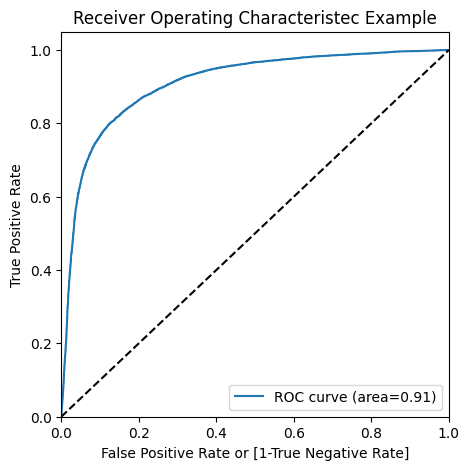

In [99]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_Probability)

### Step 7: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [100]:
# Let's create columns with different probability cutoff
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i] = y_train_sm_pred_final.Converted_Probability.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_Probability,Churn_Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.065021,0,1,0,0,0,0,0,0,0,0,0
1,0,0.387582,0,1,1,1,1,0,0,0,0,0,0
2,0,0.011444,0,1,0,0,0,0,0,0,0,0,0
3,0,0.199394,0,1,1,0,0,0,0,0,0,0,0
4,0,0.511802,1,1,1,1,1,1,1,0,0,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.700895     0.974460     0.427330
0.2          0.2  0.765087     0.954871     0.575303
0.3          0.3  0.802317     0.928910     0.675724
0.4          0.4  0.822249     0.891311     0.753186
0.5          0.5  0.833807     0.849236     0.818378
0.6          0.6  0.837177     0.799315     0.875039
0.7          0.7  0.827251     0.737651     0.916851
0.8          0.8  0.793207     0.636124     0.950290
0.9          0.9  0.642206     0.300948     0.983465


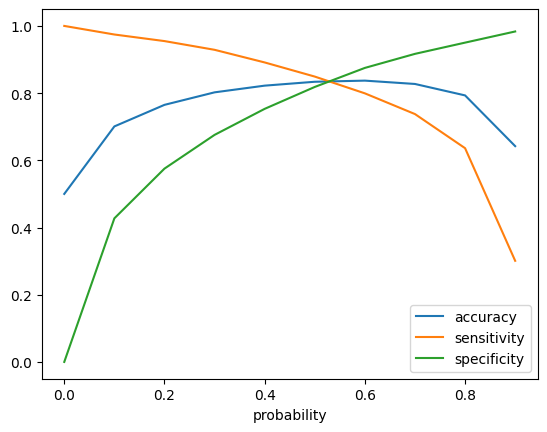

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

In [103]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_Probability.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_Probability,Churn_Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.065021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.387582,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.011444,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.199394,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.511802,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [104]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.50         0.50  0.833807     0.849236     0.818378
0.51         0.51  0.834702     0.844760     0.824645
0.52         0.52  0.835203     0.840179     0.830226
0.53         0.53  0.835756     0.835071     0.836440
0.54         0.54  0.835993     0.829331     0.842654
0.55         0.55  0.835940     0.823433     0.848447
0.56         0.56  0.836282     0.818536     0.854028
0.57         0.57  0.837019     0.814218     0.859821
0.58         0.58  0.836282     0.808373     0.864192
0.59         0.59  0.837072     0.804055     0.870090


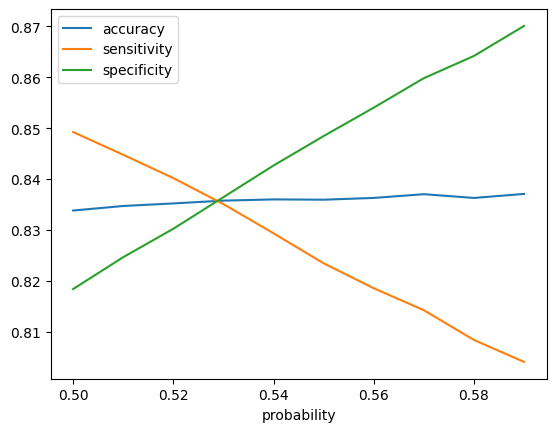

In [105]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

#### From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at 0.53

In [106]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_Probability.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_Probability,Churn_Prediction,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.065021,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.387582,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.011444,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.199394,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.511802,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [107]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8357556608741443


In [108]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[15884  3106]
 [ 3132 15858]]


In [109]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ", TP2/float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ", TN2/float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ", FP2/float(TN2+FP2))

# positive predictive value 
print ("Precision = ", TP2/float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ", TN2/float(TN2 + FN2))

Sensitivity =  0.8350710900473933
Specificity =  0.8364402317008952
False Positive Rate =  0.1635597682991048
Precision =  0.8362159881881459
True Negative Prediction Rate =  0.8352965923432899


### Step 8: Precision and Recall Tradeoff

In [110]:
from sklearn.metrics import precision_recall_curve

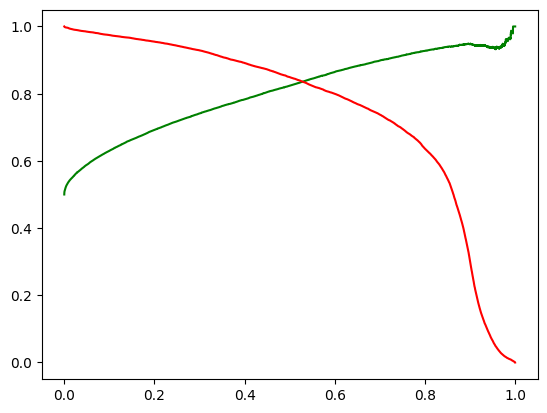

In [111]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_Probability)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Let's makie predictions on the test set
Transforming and feature selection for test data

In [112]:
# Feature selection
X_test = X_test[rfe_columns]
X_test.head()

,arpu_8,offnet_mou_8,roam_og_mou_8,std_og_t2m_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,max_rech_data_8,monthly_2g_8,monthly_3g_8,aon,Avg_arpu_67,total_rech_data_group_8_<10 Recharges
76438,0.978037,0.935897,-0.202116,-0.355839,-0.017819,1.715509,1.911058,3.640066,2.927161,2.458777,-0.237147,0.081637,0.236188,-0.527386,-0.319257,-0.297206,-0.717990,0.635016,0
72869,0.025001,0.431844,-0.202116,-0.430937,-0.017819,0.160860,0.305798,0.447149,0.703476,0.443909,-0.237147,-0.340310,0.332529,-0.527386,-0.319257,-0.297206,-0.909753,-0.133125,0
86053,-0.752717,-0.588026,-0.202116,-0.430937,-0.017819,-0.712005,0.661122,0.405099,1.020392,0.787743,-0.237147,-0.656771,0.332529,-0.527386,-0.319257,-0.297206,1.951302,-0.634247,0
29093,-0.335393,-0.310165,-0.202116,-0.365865,-0.017819,-0.550201,-0.409688,-0.377995,-0.660242,-0.644171,-0.237147,-0.656771,0.236188,0.856038,-0.319257,1.417564,-0.810282,-0.609036,0
96385,1.666647,0.162672,13.899829,-0.429546,-0.017819,-0.882436,-0.420204,-0.402904,-0.740765,-0.796360,-0.237147,0.292611,0.201780,-0.527386,-0.319257,-0.297206,0.092129,0.286130,0


In [113]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

### Predict the target variable

In [114]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 76438    0.000194
72869    0.063946
86053    0.079905
29093    0.426251
96385    0.965484
16713    0.600854
78343    0.611768
81467    0.869174
56584    0.159923
9517     0.140969
dtype: float64


In [115]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
76438,0.000194
72869,0.063946
86053,0.079905
29093,0.426251
96385,0.965484


In [116]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [117]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Churn
76438,0
72869,0
86053,0
29093,0
96385,0


In [118]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,Churn,Conv_prob
76438,0,0.000194
72869,0,0.063946
86053,0,0.079905
29093,0,0.426251
96385,0,0.965484


In [119]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,Churn,Conv_prob,test_churn_pred
76438,0,0.000194,0
72869,0,0.063946,0
86053,0,0.079905,0
29093,0,0.426251,0
96385,0,0.965484,1


In [120]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.test_churn_pred)

0.8365577051367579

### Metrics Evaluation

In [121]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[6819 1280]
 [ 190  705]]


In [122]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [123]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ", TP3/float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ", TN3/float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ", FP3/float(TN3+FP3))

# positive predictive value
print ("Precision = ", TP3/float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ", TN3/float(TN3+FN3))

Sensitivity =  0.7877094972067039
Specificity =  0.8419557970119768
False Positive Rate =  0.1580442029880232
Precision =  0.35516372795969775
True Negative Prediction Rate =  0.9728919960051362


In [124]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.Churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  84.0 %
The sensitivity of the predicted model is:  79.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



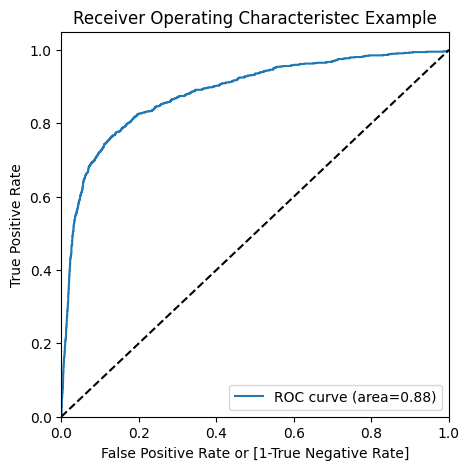

In [125]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.Churn,y_pred_final.Conv_prob)

#### Area Under Curve score for train dataseat is 0.91 and test data is 0.88
#### So, this model shall be considered as a good model.